In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('dataset_rolling_stones.xlsx')

In [3]:
df.head(2)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

In [5]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920


In [6]:
df.shape

(1610, 15)

In [7]:
print('Primeiro album:', df['release_date'].min())
print('Ultimo album:', df['release_date'].max())

Primeiro album: 1964-04-16 00:00:00
Ultimo album: 2022-06-10 00:00:00


In [8]:
#confirmando com outro metodo que nao temos dados nulos
df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [9]:
df.duplicated().sum()

6

In [10]:
df[df.duplicated()]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.520000,0.299,-2643.0,0.0898,71995.00,0.505,21,276933
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.950000,0.617,-1568.0,0.1880,162428.00,0.563,16,191266
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.383,-4386.0,0.1280,105124.00,0.364,17,222253
939,No Spare Parts,Some Girls (Deluxe Version),1978-06-09,5,0.2400,0.594,0.762,0.000015,0.712,-5145.0,0.0292,72648.00,0.540,19,270466
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.385,-5871.0,0.0390,127329.00,0.847,15,246266
946,Petrol Blues,Some Girls (Deluxe Version),1978-06-09,12,0.7690,0.835,0.621,0.114000,0.116,-8007.0,0.0406,115.87,0.336,13,95626


In [11]:
df['duracao_em_min'] = df['duration_ms'] / 60000

In [12]:
df.head(2)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550


In [13]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199,4.295608
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000,0.350000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000,3.176883
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000,4.051550
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000,4.921996
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000,16.364433
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920,1.805558


In [14]:
df.groupby('album')['duracao_em_min'].mean()

album
12 X 5                              2.682068
12 x 5                              2.682772
A Bigger Bang (2009 Re-Mastered)    4.016356
A Bigger Bang (Live)                5.176630
Aftermath                           3.899185
                                      ...   
Undercover                          4.492750
Undercover (2009 Re-Mastered)       4.497595
Voodoo Lounge (Remastered 2009)     4.118779
Voodoo Lounge Uncut (Live)          5.248507
got LIVE if you want it!            2.762532
Name: duracao_em_min, Length: 90, dtype: float64

In [15]:
df_maior_duracao_musica = df.groupby('album')['duracao_em_min'].mean().sort_values(ascending=False)

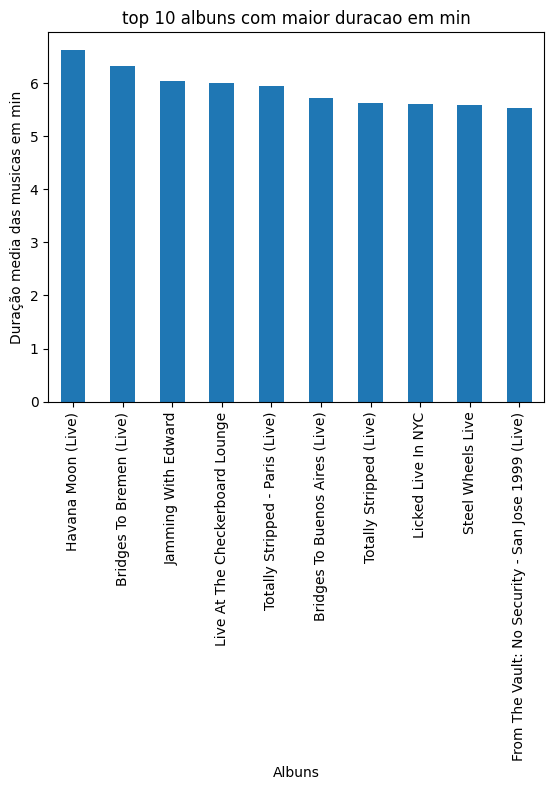

In [16]:
df_maior_duracao_musica.head(10).plot(kind='bar')
plt.title('top 10 albuns com maior duracao em min')
plt.xlabel('Albuns')
plt.ylabel('Duração media das musicas em min')
plt.show()

In [17]:
top_albuns = df['album'].value_counts().head(10).sort_values(ascending=True)

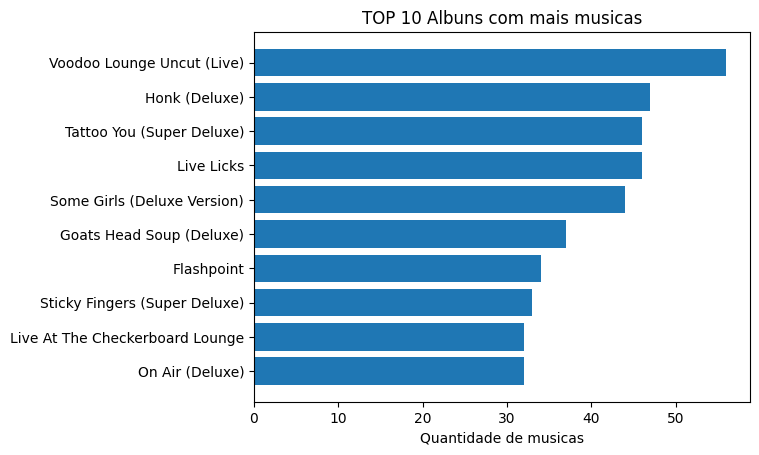

In [18]:
plt.barh(top_albuns.index, top_albuns.values)
plt.xlabel('Quantidade de musicas')
plt.title('TOP 10 Albuns com mais musicas')
plt.show()

In [19]:
df_ultima_decada = df[df["release_date"].between(pd.to_datetime("2011"), pd.to_datetime("2020"))]

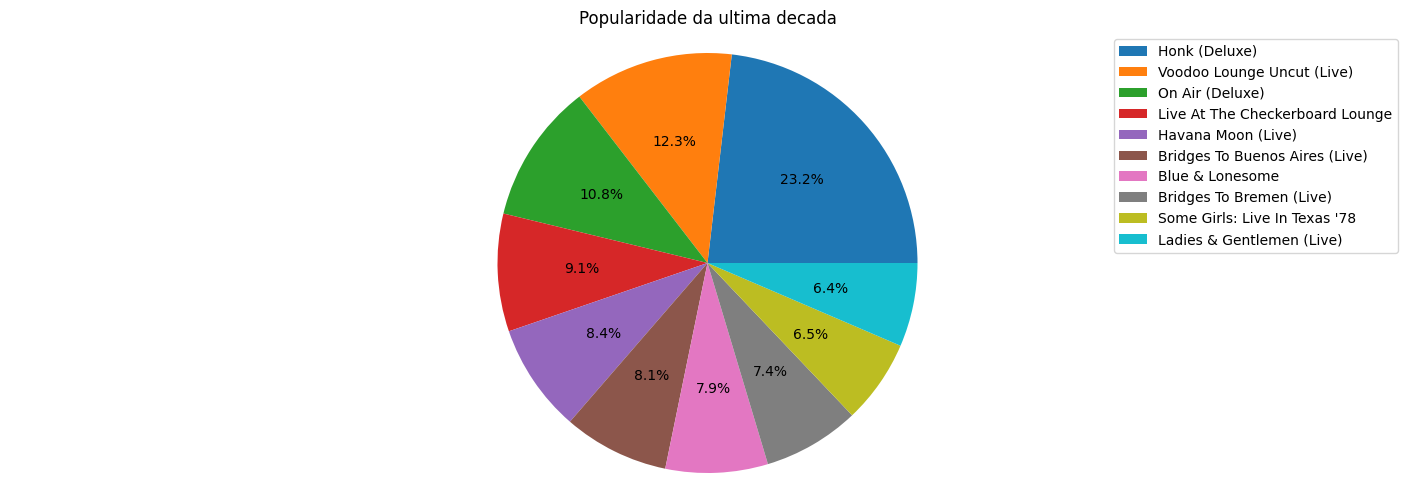

In [20]:
df_por_album = df_ultima_decada.groupby("album")['popularity'].sum().sort_values(ascending=False).head(10)
total_popularidade = df_por_album.sum()
df_porcentagem = df_por_album / total_popularidade * 100
labels = df_porcentagem.index.tolist()
sizes = df_porcentagem.values.tolist()

figura, grafico = plt.subplots(figsize=(18,6))
grafico.pie(sizes, autopct='%1.1f%%')
grafico.axis('equal')
plt.title("Popularidade da ultima decada")
plt.legend(labels, loc='best')
plt.show()

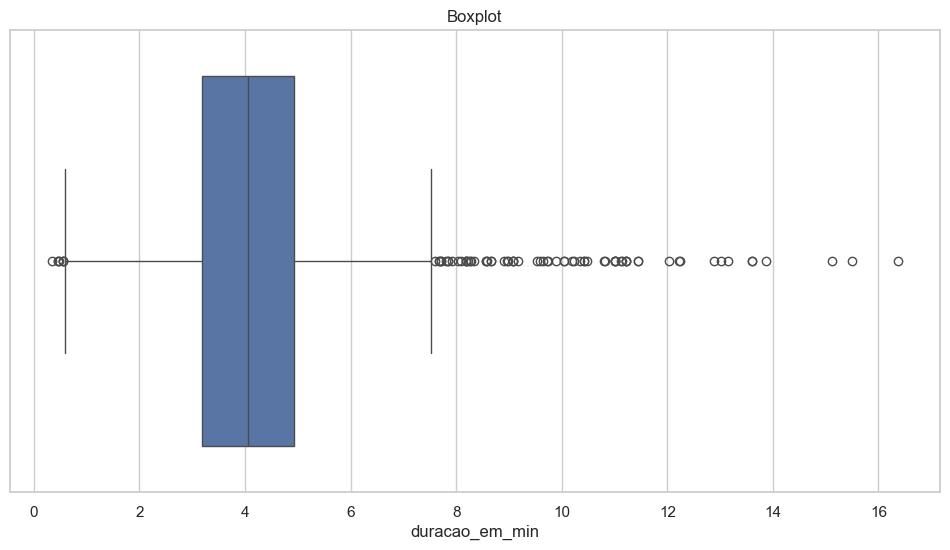

In [21]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(figsize=(12,6))
sns.boxplot(x='duracao_em_min', data=df)
axes.set_title('Boxplot')
plt.show()

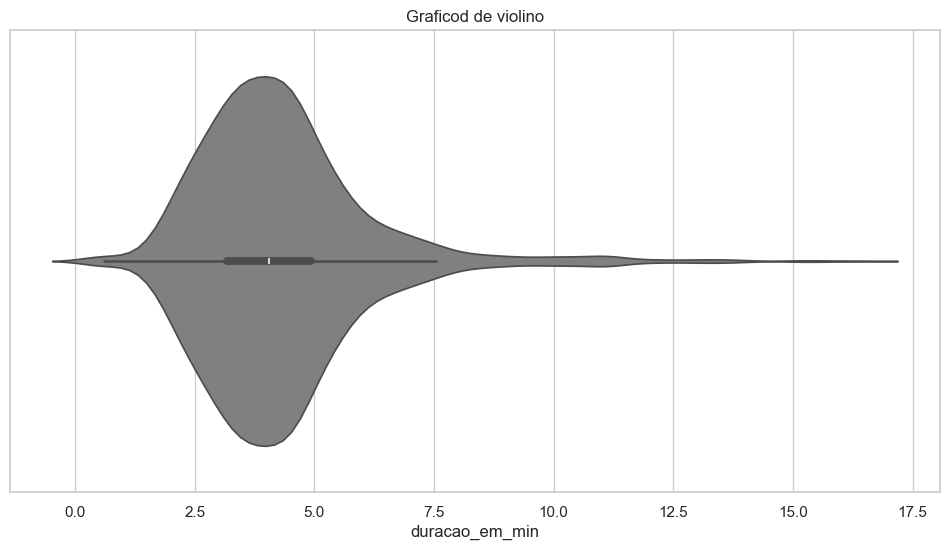

In [27]:
fig, axes = plt.subplots(figsize=(12,6))
sns.violinplot(x='duracao_em_min', data=df, color='gray')
axes.set_title('Graficod de violino')
plt.show()

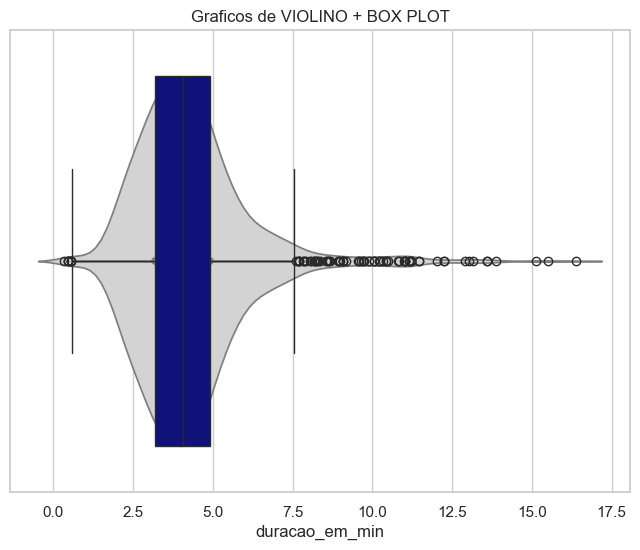

In [44]:
fig, ax = plt.subplots(figsize=(8,6))
sns.violinplot(x='duracao_em_min', ax=ax, data=df, color='lightgray')
sns.boxplot(x='duracao_em_min', ax=ax, data=df, whis=1.5,color='darkblue')
plt.title('Graficos de VIOLINO + BOX PLOT')
plt.show()

In [48]:
def classifica_musica_ao_vivo(df):
    if df['liveness'] >= 0.80:
        return True
    else:
        return False

In [49]:
df['ao_vivo'] = df.apply(classifica_musica_ao_vivo, axis=1)

In [56]:
df.groupby('ao_vivo')['ao_vivo'].count()

ao_vivo
False    1112
True      498
Name: ao_vivo, dtype: int64

In [57]:
df_gravado_em_studio = df[df['ao_vivo'] == False]
df_show_ao_vivo = df[df['ao_vivo'] == True]

In [58]:
df_gravado_em_studio.head(2)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min,ao_vivo
5,Monkey Man - Live,Licked Live In NYC,2022-06-10,6,0.275,0.34,0.956,0.125,0.741,-5539.0,0.0915,101628.0,0.125,31,244293,4.07155,False
23,Honky Tonk Women - Live At The El Mocambo 1977,Live At The El Mocambo,2022-05-13,1,0.162,0.43,0.901,0.011,0.694,-6215.0,0.0450,112077.0,0.890,32,216546,3.60910,False


In [59]:
df_show_ao_vivo.head(2)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min,ao_vivo
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667,True
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550,True


In [64]:
print("Duração média das musicas ao vivo: ", df_show_ao_vivo['duracao_em_min'].mean())
print("Duração média das musicas de estudio: ", df_gravado_em_studio['duracao_em_min'].mean())

Duração média das musicas ao vivo:  5.088648962516734
Duração média das musicas de estudio:  3.940451363908873


In [65]:
df_studio = df_gravado_em_studio.groupby('album')['loudness'].sum()
df_ao_vivo = df_show_ao_vivo.groupby('album')['loudness'].sum()

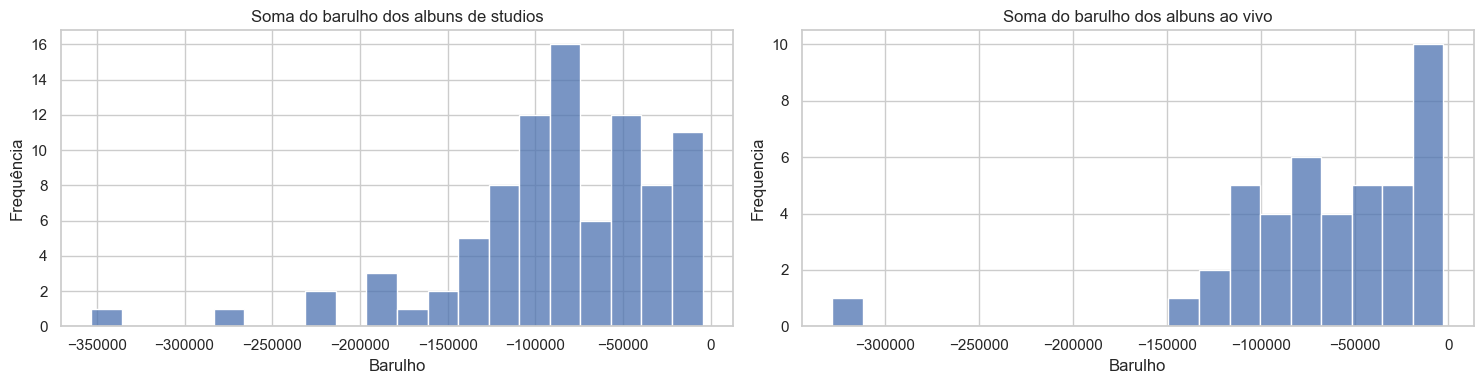

In [72]:
fig, axes = plt.subplots(1,2,figsize=(15,4))

sns.histplot(data=df_studio, bins=20, ax=axes[0])
sns.histplot(data=df_ao_vivo, bins=20, ax=axes[1])

axes[0].set_title('Soma do barulho dos albuns de studios')
axes[0].set_xlabel('Barulho')
axes[0].set_ylabel('Frequência')

axes[1].set_title('Soma do barulho dos albuns ao vivo')
axes[1].set_xlabel('Barulho')
axes[1].set_ylabel('Frequencia')

fig.tight_layout()

plt.show()

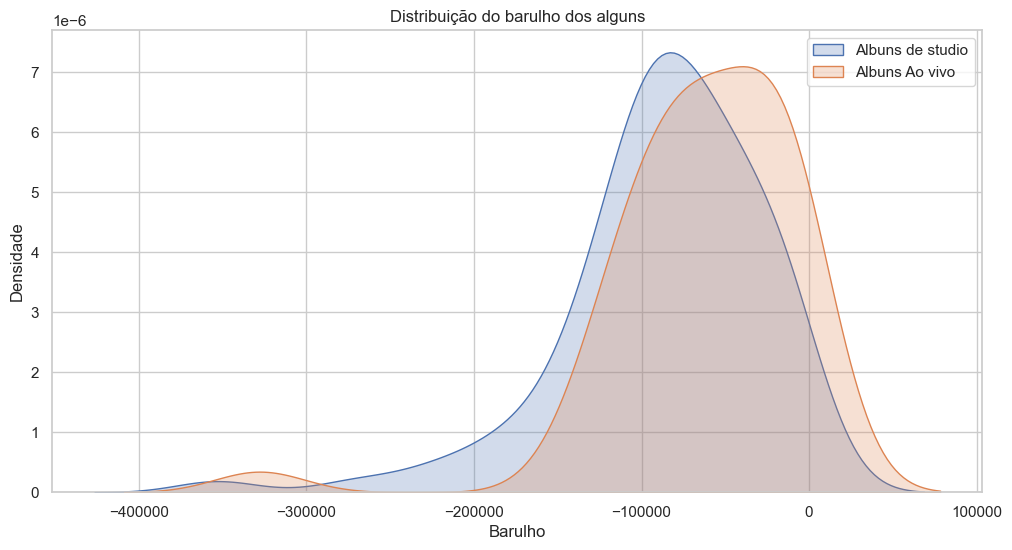

In [78]:
plt.figure(figsize=(12,6))

sns.kdeplot(data=df_studio, label='Albuns de studio', fill=True)
sns.kdeplot(data=df_ao_vivo, label='Albuns Ao vivo', fill=True)
plt.title('Distribuição do barulho dos alguns')
plt.xlabel('Barulho')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [79]:
#testando se o barulho segue uma distribuição normal
from scipy.stats import shapiro

In [91]:
stat, p = shapiro(df_studio)
print("Soma do barulho dos albuns de estudio: ")
print('Estatistica de teste: {:.6f}, valor p: {:.6f}'.format(stat,p))

if p > 0.05:
    print('Não há evidência suficiente para rejeitar a hipostese de normalidade')
else:
    print('A hipostese de normalidade é rejeitada')

Soma do barulho dos albuns de estudio: 
Estatistica de teste: 0.895815, valor p: 0.000003
A hipostese de normalidade é rejeitada


In [92]:
stat, p = shapiro(df_ao_vivo)
print("Soma do barulho dos albuns de estudio: ")
print('Estatistica de teste: {:.6f}, valor p: {:.6f}'.format(stat,p))

if p > 0.05:
    print('Não há evidência suficiente para rejeitar a hipostese de normalidade')
else:
    print('A hipostese de normalidade é rejeitada')

Soma do barulho dos albuns de estudio: 
Estatistica de teste: 0.791343, valor p: 0.000002
A hipostese de normalidade é rejeitada


In [94]:
media_por_album = df.groupby('album')['valence'].mean().reset_index()
media_por_album = media_por_album.rename(columns={'valence': 'media_valence'})
media_por_album['sentimento'] = ['positivo' if v > 0.6 else 'negativo' for v in media_por_album['media_valence']]

media_por_album.groupby('sentimento')['sentimento'].count()

sentimento
negativo    38
positivo    52
Name: sentimento, dtype: int64

In [95]:
media_por_album.head(2)

,album,media_valence,sentimento
0,12 X 5,0.704000,positivo
1,12 x 5,0.689917,positivo


In [96]:
df_resultado_final = pd.merge(df, media_por_album, on='album')
df_resultado_final.head(2)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min,ao_vivo,media_valence,sentimento
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667,True,0.27117,negativo
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550,True,0.27117,negativo


In [105]:
df_resultado_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

In [109]:
df_numeric = df_resultado_final.select_dtypes(include=['number'])
matriz_correlacao = df_numeric.corr()

In [110]:

correlacao_sentimento = matriz_correlacao['media_valence']

display(correlacao_sentimento)

track_number       -0.115007
acousticness        0.015491
danceability        0.492945
energy             -0.347447
instrumentalness    0.133741
liveness           -0.571749
loudness           -0.229543
speechiness        -0.416005
tempo              -0.028887
valence             0.603258
popularity          0.100509
duration_ms        -0.309499
duracao_em_min     -0.309499
media_valence       1.000000
Name: media_valence, dtype: float64

<Axes: >

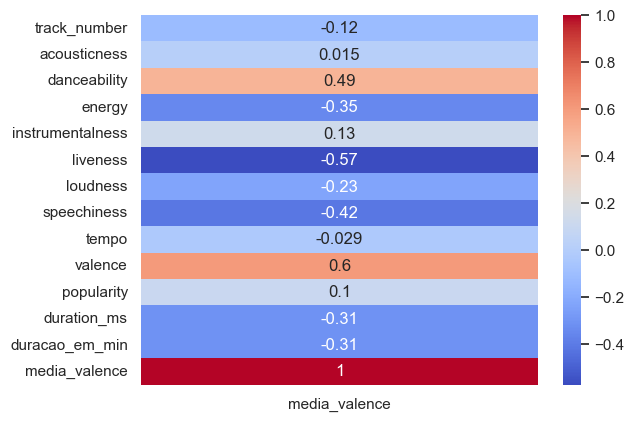

In [112]:
sns.heatmap(correlacao_sentimento.to_frame(), annot=True, cmap='coolwarm')

<Axes: >

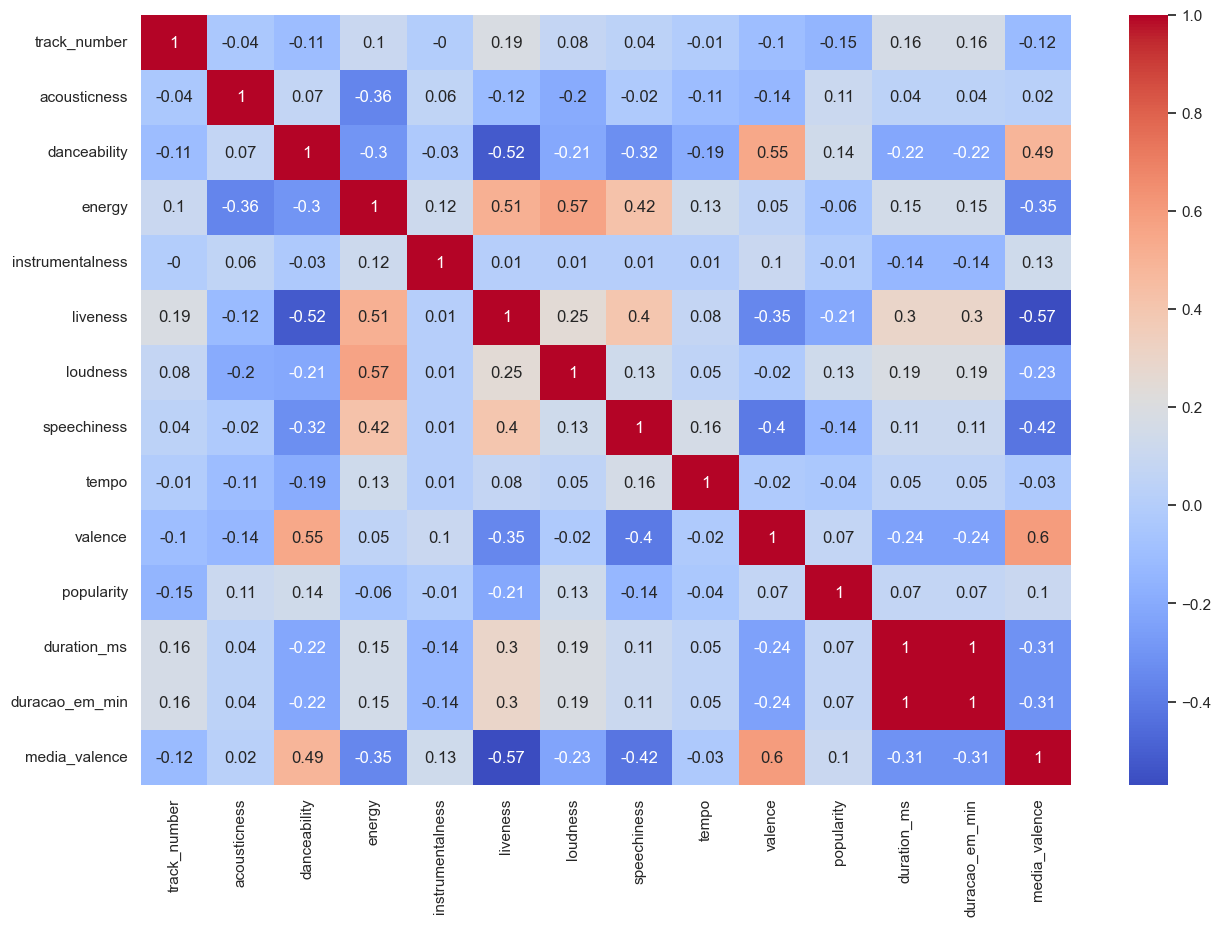

In [116]:
plt.figure(figsize=(15,10))
sns.heatmap(matriz_correlacao.round(2), annot=True, cmap='coolwarm')